In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# II. Summarizing the data

I began by importing the necessary packages:

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline
sns.set_style('whitegrid')

Next I read in the dataframe and did some basic exploratory analysis:

In [3]:
df = pd.read_csv('train_housingprices.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

First thing I notice is that there is a column called 'Id' which is basically just the original database's way of identifying each house. It isn't relevent here so I will drop it:

In [6]:
df.drop('Id',axis=1,inplace=True)

With that dropped, we now have 79 explanatory variables related to our variable of interest 'SalePrice'.

I want to summarize the dataframe. The numeric ordinal variables are all ratings of quality, so it makes sense to take the 'mean' of them since a rating of 4.5 for quality does seem legitimate.

In [7]:
df.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

First I will look at a description of the categorical variables:

In [8]:
df.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Next I will look at a description of the numeric variables:
    
** Note: Some of the numeric variables are actually ordinal, but those ordinal variables refer to quality of a given feature, so I thought it made sense to include them here.

In [9]:
df.describe(include=[int,float])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# III. Examining relationships with outcome variable:

The [documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) for the dataset warned me that there were outliers in the data and I knew that I would be using linear regression which is sensitive to outliers.

I decided to look at the distribution for SalePrice:

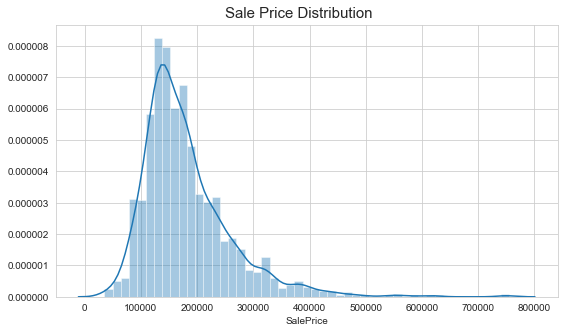

In [10]:
plt.figure(figsize=(9, 5))
plt.figtext(.5,.9,'Sale Price Distribution', fontsize=15, ha='center')
sns.distplot(df['SalePrice'])

It is slightly right skewed which kind of makes sense since most people will be unable to afford super expensive homes. I will look at this later in further detail.

Next, I chose a few variables I found interesting and examined their relationship with SalePrice:

#### First up: 'HouseStyle'

In [11]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

According to the documentation, house style refers to the 'style of dwelling' - ie the number of floors, whether or not they are unfinished, and whether or not they have a floor with 'slanted' walls.

For example: 2.5Fin means 2.5 stories where the second floor is finished and there is an additional floor with 'slanted' walls (most likely an attic type space).

What I found the most interesting is that roughly half the dataset refers to 1-story homes.

In [ ]:
plt.figure(figsize=(15, 8))
plt.figtext(.5,.9,'Relationship between Sale Price and Home Style', fontsize=15, ha='center')
sns.boxplot(x='HouseStyle',y='SalePrice',data=df,order=['2Story','2.5Fin','1Story','SLvl','SFoyer','1.5Fin','2.5Unf','1.5Unf'])

So, again, the points outside the whiskers indicate that there are possible outliers. I will leave them for now and come back to them later. Either way it does appear like there is a correlation between sale price and house style. It looks as though finished homes are worth more than unfinished homes.

#### Neighborhood

Next I looked at the relationship between SalePrice and Neighborhood. There are 25 total neighborhoods.

In [ ]:
plt.figure(figsize=(19,10))
plt.xticks(rotation=90)
plt.figtext(.5,.9,'Relationship between Sale Price and Neighborhood', fontsize=20, ha='center')
sns.boxplot(x='Neighborhood',y='SalePrice',data=df)

So, the boxplot does seem to indicated a relationship between neighborhood and sale price. I will examine this more rigorously later on after I fill nulls and standardize my data.

#### YrSold and MoSold

I next looked at YrSold:

In [ ]:
plt.figure(figsize=(10, 6))
plt.figtext(.5,.9,'Relationship between Sale Price and Year Sold', fontsize=15, ha='center')
sns.boxplot(x='YrSold',y='SalePrice',data=df)

There doesn't seem to be much of a relationship here. This could be a candidate for deletion later on.

How about month sold?

In [ ]:
plt.figure(figsize=(10, 6))
plt.figtext(.5,.9,'Relationship between Sale Price and Month Sold', fontsize=15, ha='center')
sns.boxplot(x='MoSold',y='SalePrice',data=df)

There is some slight variation within the median sale price by month sold but it does appear to be marginal. This could also be a good candidate for deletion.

#### OverallQual

In [ ]:
plt.figure(figsize=(10, 6))
plt.figtext(.5,.9,'Relationship between Sale Price and Overall Quality', fontsize=15, ha='center')
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

Not super shocking. As quality increases so does the home's sale price.

#### OverallCond

How about overall condition? This rates the 'overall condition' of the home on a scale from 1-10.

In [ ]:
plt.figure(figsize=(12, 9))
plt.figtext(.5,.9,'Relationship between Sale Price and Overall Condition', fontsize=15, ha='center')
sns.boxplot(x='OverallCond',y='SalePrice',data=df)

In [ ]:
df['OverallCond'].value_counts()

In [ ]:
df['SalePrice'].describe()

The above graph is kind of interesting. It initially seems as though overall condition doesn't have the same linear appearing affect on sale price as overall quality does. This somewhat contradicts our intuition that homes in better condition would have a higher sale price.

After some further investigating shown above, it seems that 821 homes at roughly ~56% of the dataset has overall condition equal to 5. Similarly, the average sale price for all homes is ~$180,921 which is about the median of OverallCond=5 shown in the graph above. I think this largely explains the discrepancy and the reason why there are so many points shown outside of the whiskers for this particular box.

#### GrLivingArea

Next I looked at the relationship between 'GrLivingArea' (square feet of above ground living area) and sale price:

In [ ]:
plt.figure(figsize=(15, 7))
plt.figtext(.5,.9,'Relationship between GrLivArea and Sale Price', fontsize=15, ha='center')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

The first thing to notice is that there are some outliers. This is also indicated by the documentaton which says that it is recommended to delete any homes with more than 4000 square feet from the dataset.

We will do this right now:

In [ ]:
df[df['GrLivArea']>4000]

In [ ]:
df.drop(index=[523,691,1182,1298],inplace=True)

Now we can run the above graph again to get a better idea of what is going on:

In [ ]:
plt.figure(figsize=(15, 7))
plt.figtext(.5,.9,'Relationship between GrLivArea and Sale Price', fontsize=15, ha='center')
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

First, we notice that the relationship appears linear. Second, we notice that as above ground living area increases, the variance for sale price increases. Either way, this is a promising variable which makes sense because a home's square feet is typically of great interest to potential buyers.

# IV. Cleaning and standardizing data:
> **I. Locating nulls**<br>
Here I locate nulls and decide how to deal with them based on whether or not I believe the data is ignorable. <br><br>
> **II. Filling nulls**<br>
Here I fill the null values of non-ordinal features based on the decision from part 1. <br><br>
> **III.** Standardizing data<br>
Here I write a function to standardize the numerical columns in my dataframe.<br><br>
> **IV.** Dealing with ordinal variables<br>
Here I use a 'quality' vector which reassigns the ordinal values to the numerical number associated with their quality. This will prepare the data for the machine learning step.



## I. Locating nulls

My general strategy for this is to find columns with missing values and then decide whether or not the missing data is ignorable or not. After that I will decide whether or not to fill the missing values or just get rid of the column altogether.

I will append all of this information to a dataframe that I will consult when filling or deleting the nulls.

In [ ]:
missing_dict = {}

Find columns with missing values:

In [ ]:
df.columns[df.isna().any()].tolist()

Now I will go through each variable with missing data and append my findings to the dataframe.

## Lot frontage:

Lot frontage refers to the length of the front of the property. Presumably this will be correlated with lot area and neighborhod.

In [ ]:
df[df['LotFrontage'].isna()].index

Lot frontage has 259 missing values.

It is unclear whether or not this missing data is ignorable.

However, I am trying to learn my lesson from the titanic dataset and in this instance will go with the simplest method of filling by the median lot frontage of the home's neighborhood. If I am looking to improve model accuracy later on I will consider a more complicated method of filling null values.

In [ ]:
missing_dict['LotFrontage'] = ['Continuous','259',259/1456,'Unclear','Unclear','Fill with median lot frontage of neighborhood']

## Alley

Refers to the type of alley access to the property.

In [ ]:
df['Alley'].value_counts()

The documentation states that 'NaN' refers to homes where there is no alley. This and the above suggest that missing values are ignorable.

In [ ]:
missing_dict['Alley'] = ['Nominal','1369',1369/1456,'Yes','Seen in documentation','Fill in None']

## Masonry

There are two variables dedicated to masonry: MasVnrType and MasVnrArea

This refers to the type of masonry veneer. If you don't know what this is don't fret because I had no idea either. It basically just refers to whatever type of masonry is put on the outside of the home. It seeems to have mostly aesthetic properties.

MasVnrArea refers to masonry veneer area, ie the total square footage decorated with masonry.

I wanted to compare nulls for both of these variables since I thought it might help me decide whether or not they were ignorable:

In [ ]:
df['MasVnrType'].value_counts()

Looking at nulls for masonry veneer type:

In [ ]:
df[df['MasVnrType'].isna()]

Looking at nulls for masonry veneer area:

In [ ]:
df[df['MasVnrArea'].isna()]

Since the most common value for masonry veneer type is none and the missing values for masonry veneer and type are eqaul, I will assume that they should be filled with 'none' and remedy that way.

In [ ]:
missing_dict['MasVnrType'] = ['Nominal',8,8/1456,'Yes','Incredibly small fraction of dataset & missing values match missing for masonry veneer area','Fill with most common value']

In [ ]:
missing_dict['MasVnrArea'] = ['Continuous',8,8/1456,'Yes','Incredibly small fraction of dataset & missing values match missing for masonry veneer type','Fill with 0']

## Basement variables

There are five variables that describe characteristics of the home's basement:
    1. 'BsmtQual' - evaluates height of the basement
    2. 'BsmtCond' - evaluates overall condition of the basement
    3. 'BsmtExposure' - refers to walkout or garden level walls
    4. 'BsmtFinType1' - rating of basement finished area
    5. 'BsmtFinType2' - rating of basement finish area (if multiple types)
    
Let's investigate the missing values:

In [ ]:
df[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].info()

Observe that we have 37 missing entries for basement quality, condition and finish type 1. There are 38 missing entries for basement exposure and finish type 2.

Let's see the possible values for basement quality:

In [ ]:
df['BsmtQual'].value_counts()

From the above and the documentation, we can assume that the missing values are ignorable because they just indicate that the home has no basement

In [ ]:
missing_dict['BsmtQual'] = ['Ordinal',37,37/1456,'Yes','Seen in documentation',"Fill with 'none'"]

Let's check for basement condition:

In [ ]:
df['BsmtCond'].value_counts()

Again, the documentation and the above suggest that the missing values are ignorable because these homes have no basement.

In [ ]:
missing_dict['BsmtCond'] = ['Ordinal',37,37/1456,'Yes','Seen in documentation',"Fill with 'none'"]

Check for basement finish type 1:

In [ ]:
df['BsmtFinType1'].value_counts()

Again, the documentation and the above suggest that these missing values are ignorable because the homes don't have a basement.

In [ ]:
missing_dict['BsmtFinType1'] = ['Ordinal',37,37/1456,'Yes','Seen in documentation',"Fill with 'none'"]

I also wanted to check to make sure that the homes where basement condition, quality and finish type 1 are all the same. If they are not then this would suggest that I was wrong to classify them as ignorable:

In [ ]:
df[(df['BsmtQual'].isna()) & (df['BsmtCond'].isna()) & (df['BsmtExposure'].isna()) & (df['BsmtFinType1'].isna()) & (df['BsmtFinType2'].isna())].count().head()

Okay, yup. All the homes are the same so it is safe to say that none of these homes actually have a basement.

Lastly I need to investigate basement exposure and finish type 2. These features are interesting because they have one more row with a missing value than the previous basement variables.

Let's investigate basement finish type 2 first. My guess is this will be easier to explain.

In [ ]:
df['BsmtFinType2'].value_counts()

Okay, so it seems likely from the above and from the documentation that the missing values are ignorable because they refer to homes without a basement.

I would like to check two things:
    1. Are all 37 homes missing basement finish type 1 also missing basement finish type 2?
    2. Is there only one home that is not missing basement finish type 1 but is missing basement finish type 2?

In [ ]:
df[(df['BsmtFinType1'].isna()==False) & (df['BsmtFinType2'].isna())]

In [ ]:
df[(df['BsmtFinType1'].isna()) & (df['BsmtFinType2'].isna())].count().head()

So, yes. Both of the above questions are correct. This suggests that the missing date for basement finish type 2 is ignorable and refers to homes without a second basement finish type.

In [ ]:
missing_dict['BsmtFinType2'] = ['Ordinal',38,38/1456,'Yes','Seen in documentation',"Fill with 'none'"]

Now it's time to investigate the last basement variable: basement exposure.

In [ ]:
df['BsmtExposure'].value_counts()

Yeah, from the documentation it appears that the missing values here are because the home has no basement.

In [ ]:
missing_dict['BsmtExposure'] = ['Ordinal',38,38/1456,'Yes','Seen in documentation',"Fill with 'none'"]

## Electrical

Refers to the type of electrical system in the home.

In [ ]:
df[df['Electrical'].isna()]

In [ ]:
df['Electrical'].value_counts()

From the above we see that there is only one missing value and the most common value by far is 'SBrkr' which stands for standard circuit breakers & romex.

Since there is only one missing value and most of the homes use 'SBrkr' I'm just going to save myself the trouble and will with that.

In [ ]:
missing_dict['Electrical'] = ['Ordinal',1,1/1456,'Yes','Tiny fraction of dataset',"Fill with 'SBrkr'"]

## Fireplace Quality

Pretty obvious. Refers to the quality of the fireplace. Let's investigate:

In [ ]:
df[df['FireplaceQu'].isna()].count().head()

There are 690 missing values. We also have another variable called 'fireplaces' which just tells us the number of fireplaces in the home.

If there are 690 homes without a fireplace, it would make sense that the 690 missing values for fireplace quality are ignorable.

In [ ]:
df[(df['Fireplaces']==0) & (df['FireplaceQu'].isna())].count().head()

So yeah, the homes where there is not fireplace are the same homes where fireplace quality is null. This suggests that the missing data is ignorable because it refers to homes without a fireplace.

In [ ]:
missing_dict['FireplaceQu'] = ['Ordinal',690,690/1456,'Yes','Seen in documentation',"Fill with 'None'"]

## Garage variables

There are five variables that explain characteristics of a home's garage:
    1. Garage type
    2. Garage year built
    3. Garage finish
    4. Garage quality
    5. Garage condition

In [ ]:
df[df['GarageType'].isna()].count().head()

In [ ]:
df[df['GarageYrBlt'].isna()].count().head()

In [ ]:
df[df['GarageFinish'].isna()].count().head()

In [ ]:
df[df['GarageQual'].isna()].count().head()

In [ ]:
df[df['GarageCond'].isna()].count().head()

We can see that there are 81 missing data points for each of the garage variables. Based on the documentation I will assume that they are ignorable and refer to homes without a garage.

Now I will use a for loop to fill the missing dictionary for the garage variables that are ordinal:

In [ ]:
garage_ordinal = ['GarageFinish','GarageQual','GarageCond']

In [ ]:
i=0
for i in range(0,len(garage_ordinal)):
    missing_dict[garage_ordinal[i]] = ['Ordinal',81,81/1456,'Yes','Documentation',"Fill with 'None'"]
    i+=1

Now I will fill the dictionary for garage type:

In [ ]:
missing_dict['GarageType'] = ['Nominal',81,81/1456,'Yes','Documentation',"Fill with 'None'"]

I want to investigate GarageYrBlt. I am considering deleting this column because I am going to assume that in most cases it is the same as YrBlt.

In [ ]:
plt.figure(figsize=(10, 6))
plt.figtext(.5,.9,'Relationship between YearBuilt and GarageYrBlt', fontsize=15, ha='center')
sns.scatterplot(x='GarageYrBlt',y='YearBuilt',data=df)

Okay, so we see that it is reasonable to suspect that there exists a linear relationship between YearBuilt and GarageYrBlt with some exceptions for homes that had a garage built on later.

Strangely, there are a few instances where the garage was built before the actual home. This suggests some kind of data entry error and I will correct this after computing the pearson coefficient.

I now want to check the pearson coefficient for both variables. Recall that the pearson coefficient is a measure of the linear relationship between numerical variables. I am classifying 'Year' in this case as numerical in line with the documentation.

Since the pearson correlation in SciPy only accepts 1D arrays without null values, I decided to create a function that would modify two columns to meet these requirements and print the desired output.

In [ ]:
def pearson_corr(data, col1, col2):
    # create list of indices where the columns of interest have null values
    index1 = data.index[data[col1].isna()==True].tolist()
    index2 = data.index[data[col2].isna()==True].tolist()
    # create temporary dataframe and array that drops the rows with indices in the above list
    df1 = data.drop(labels=index1+index2)
    x = np.array(df1[col1])
    y = np.array(df1[col2])
    # print pearson correlation
    print("Pearson correlation:  {:5f}".format(sp.stats.pearsonr(x,y)[0]))
    print("2-sided p-value:  {:5f}".format(sp.stats.pearsonr(x,y)[1]))

In [ ]:
pearson_corr(df,'GarageYrBlt','YearBuilt')

Seeing a p-value of 0.0 was strange. I did some research and discovered that SciPy doesn't distinguish between zero and numbers below some threshold where the threshold varies based on the datatype. Since the p-value in this case is below the threshold, it defaults to zero.

Whatever this number actually is, it's clear that it is small enough to reject the null hypothesis that these variables are not correlated. Because of this, I will delete the "GarageYrBlt" variable later on. Since I plan on deleting this column, I will ignore the values where GarageYrBlt is before YearBuilt.

In [ ]:
missing_dict['GarageYrBlt'] = ['Nominal',81,81/1456,'Yes','Documentation','Delete column']

## PoolQC

This refers to pool quality.

First I will check how many nulls there are:

In [ ]:
df[df['PoolQC'].isna()].count().head()

Now I will check if the homes where pool quality is null are also homes where pool area (square footage) equals zero. This will suggest that data is ignorable because the missing values refer to homes without a pool.

In [ ]:
df[(df['PoolQC'].isna()) & (df['PoolArea']==0)].count().head()

Yup, they are both the same. This suggests that the data is ignorable.

In [ ]:
missing_dict['PoolQC'] = ['Ordinal',1451,1451/1456,'Yes','Seen in documentation',"Fill with 'None'"]

## Fence

Refers to fence quality. Let's investigate:

In [ ]:
df[df['Fence'].isna()].count().head()

In [ ]:
df['Fence'].value_counts()

Based on the above and the documentation the null values are most likely ignorable and refer to homes without a fence.

In [ ]:
missing_dict['Fence'] = ['Ordinal',1176,1176/1456,'Yes','Seen in documentation',"Fill with 'None'"]

## Miscellaneous Feature

Refers to homes with miscellaneous features not covered by other categories.

Let's investigate:

In [ ]:
df[df['MiscFeature'].isna()].count().head()

In [ ]:
df['MiscFeature'].value_counts()

Based on the above and the documentation the missing values are most likely ignorable and refer to homes without miscellaneous features.

In [ ]:
missing_dict['MiscFeature'] = ['Nominal',1402,1402/1456,'Yes','Seen in documentation',"Fill with 'None'"]

### Make a dataframe of information on missing features using the missing_dict created previously:

In [ ]:
missing_df = pd.DataFrame.from_dict(missing_dict,orient='index',columns=['Type of variable','Number of missing data points','Percentage missing of total dataset','Is it ignorable?','Why?','Remedy'])

## II. Filling null values:

In [ ]:
missing_df

In [ ]:
df["LotFrontage"] = df.groupby("Neighborhood")['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [ ]:
for col in missing_df.index.tolist():
    # fill columns based on the action outlined by 'Remedy' in missing_df
    if missing_df.ix[col]['Remedy'] == "Fill with 'SBrkr'":
        df[col].fillna('SBrkr',inplace=True)
    elif missing_df.ix[col]['Remedy'] == "Fill with 0":
        df[col].fillna(0,inplace=True)
    elif missing_df.ix[col]['Remedy'] == "Delete column":
        df.drop(columns=col,axis=1,inplace=True)
    # the remaining values just say to fill in with none
    else:
        df[col].fillna('None',inplace=True)

Lastly I just want to check that all the nulls were filled:

In [ ]:
df.columns[df.isna().any()].tolist()

Perfect! Empty list means all the null values have been filled and we can proceed to the next step.

## III. Dealing with ordinal variables:

The reason I created a separate subsection for ordinal variables is because this dataset has columns with ordinal variables that exist with and without null values. The issue with ordinal variables is not just how to fill the null values but also how to best represent them before the model is executed.

Ordinal variables are categorical, which suggests that dummies need to be created for them, but they are also ordered, which opens the possibility of not dummifying them and instead representing them on a continuous scale. The latter take seems reasonable in instances where the dataset represents numerical values of 'quality'. The trick with ordinal variables is to determine whether or not the spacing between quantities is equal- ie to determine whether the difference between one and two the same as the difference between two and three.

For this dataset, I will treat ordinal variables that are defined on a numerical scale as continuous. There exists fancier methods for dealing with ordinal variables but I will just use this simple one for now and come back to it later if I want to improve model accuracy.

First I want to create a 'quality' dictionary which I can use to map the values of the ordinal values that use quality to a number:

In [ ]:
qualities_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0, np.nan:0}

Now I need to make a list of variables that use the same ranking described in the qualities dictionary:

In [ ]:
qualities_vars = ['ExterQual','HeatingQC','KitchenQual','PoolQC','BsmtQual','BsmtCond','GarageQual','GarageCond','FireplaceQu']

Now I need to map each cariable in the above list to the qualities dictionary:

In [ ]:
for col in qualities_vars:
    df[col] = df[col].map(qualities_dict)

The rest of the ordinal variables have unique rankings so I deal with each individually.

In [ ]:
df['LotShape'] = df['LotShape'].map({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})

In [ ]:
df['LandSlope'] = df['LandSlope'].map({'Gtl':3, 'Mod':2, 'Sev':1})

In [ ]:
df['Functional'] = df['Functional'].map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})

In [ ]:
df['PavedDrive'] = df['PavedDrive'].map({'Y':3, 'P':2, 'N':1})

In [ ]:
df['Electrical'] = df['Electrical'].map({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

In [ ]:
df['Fence'] = df['Fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'None':0})

In [ ]:
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'None':0})

In [ ]:
for col in ['BsmtFinType1','BsmtFinType2']:
    df[col] = df[col].map({'GLQ':6 ,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0})

In [ ]:
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'None':0})

Okay, to wrap this up I will summarize what I did in this section:

First I identified columns with missing values and tried to classify the missing data as ignorable or not. I used this assessment to determine a strategy for filling the nulls. Next I used this strategy to fill the null values and standardize the numerical data. Lastly I converted the ordinal variables to exist on a continuous scale.

## IV. Standardizing the data

For this step I wanted to create a function that would take in a dataframe and do the work of identifying numerical columns and standardizing them for me.

My plan is write a function that checks the datatype of each column in the dataframe. If the datatype is not 'O' (pandas dataframes store strings as objects) I will standardize it using the standardscaler function from scikit learn. The only issue here is that there are columns that are coded as numbers but are really categorical or ordinal- for example 'MSSubClass,' 'OverallQual' and 'YrSold'. I couldn't really think of a great way to automate deciding which variable was continuous or not so I had to do this step manually.

First I wanted to check which datatypes were present in the dataframe:

In [ ]:
df.columns.to_series().groupby(df.dtypes).groups

As mentioned in the description above, I noticed that some of the int64 datatypes described categorical variables. I will manually convert those to strings:

In [ ]:
cat_vars_miss = ['MSSubClass','YearBuilt','YearRemodAdd','MoSold','YrSold']

In [ ]:
for col in cat_vars_miss:
    df[col] = df[col].astype(str)

In [ ]:
df[cat_vars_miss].columns.to_series().groupby(df.dtypes).groups

Similarly, the table above indicates that some of the object datatypes describe ordinal variables. Since I have chosen to treat ordinal variables as continuous, I will manually convert these to integers.

In [ ]:
ord_vars_miss = ['BsmtQual','BsmtCond','BsmtExposure','Electrical','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','LotShape','LandSlope','Functional','BsmtFinType1','BsmtFinType2','GarageFinish','ExterQual','HeatingQC','KitchenQual']

In [ ]:
for col in ord_vars_miss:
    df[col] = pd.to_numeric(df[col], errors='ignore')

In [ ]:
df[ord_vars_miss].columns.to_series().groupby(df.dtypes).groups

Okay, cool! It worked which means I can now make a function to standardize the data.

In [ ]:
def standardize_df(dataf):
    scaler = StandardScaler()
    num_vars = [None]*len(dataf.columns)
    for col in dataf.columns.tolist():
        if (dataf[col].dtype == 'int64') or (dataf[col].dtype == 'float64'):
            num_vars.append(col)
    i = 0
    while i<len(num_vars):
        if not num_vars[i]:
            del num_vars[i]
        else:
            i+=1
    df[num_vars] = scaler.fit_transform(df[num_vars])

In [ ]:
standardize_df(df)

# V. Feature Engineering

I decided not to focus too much on feature engineering because for this project I was more interested in trying regularization out. If I come back to this project in the future feature engineering and specifically interaction terms is something I will probably work on.

However, there were a few variables in this dataset that really bothered me and that I wanted to do something with.

### Utilities

Utilities has two classes one of which only applies to a single row in the dataset. I will delete this column.

In [ ]:
df['Utilities'].value_counts()

In [ ]:
df.drop('Utilities',axis=1,inplace=True)

### Miscellaneous features

In [ ]:
df['MiscVal'].value_counts()

In [ ]:
pearson_corr(df,'MiscVal','SalePrice')

P-value too large to reject the null hypothesis that MiscVal and SalePrice are not correlated.

In [ ]:
df['MiscFeature'].value_counts()

Based on the results for the pearson correlation I am skeptical that miscellaneous features are a meaningful indication of sale price. That being said, I really don't like deleting information. My compromise is that I will alter MiscFeature to describe whether or not a home has one. If I come back to this in the future this would be a good instance to use an interaction term.

In [ ]:
df['MiscFeature'] = df['MiscFeature'].map({'None':0, 'Shed':1, 'Othr':1, 'Gar2':1, 'TenC':1})

### <b> MoSold </b> and <b> YrSold </b>

I want to check if the month and year in which a home is sold is a good indication of sale price.

Because month and year sold are both categorical variables, I couldn't use a pearson correlation and instead opted to create a function that would basically conduct ANOVA for me.

In [ ]:
# ANOVA for categorical variables
def anova_categorical(data, dependent_var, regex, independent_var):
    cat_df = data.filter([independent_var, dependent_var], axis=1)
    cat_df = pd.get_dummies(data=cat_df, columns=[independent_var], drop_first=True)
    
    # create constant term to estimate y-intercept
    cat_df['constant'] = 1
    
    # finds all iterations of categorical variable after they have been one hot encoded and adds them to a list
    pattern = re.compile(regex)
    matches = [x for x in cat_df.columns if pattern.match(x)]
    
    # adds constant term to list
    matches.append('constant')
    
    # create regression model, get estimates, print summary
    regression = sm.OLS(endog=cat_df[dependent_var], exog=cat_df[matches], missing='drop')
    results = regression.fit()
    print(results.summary())

Running for MoSold and sale price:

In [ ]:
anova_categorical(data=df, dependent_var='SalePrice', regex=r'^MoSold', independent_var='MoSold')

Running for YrSold and sale price:

In [ ]:
anova_categorical(data=df, dependent_var='SalePrice', regex=r'^YrSold', independent_var='YrSold')

As we can see from the p-values associated with the coefficients for year and month sold, none of them are statistically significant at the 5% or even the 10% level. Additionally, the F-statistic and associated p-value indicated by Prob(F-statistic) suggests that we should fail to reject the null hypothesis that the regression coefficients are equal to zero at the 5% or even 10% level. I did not consider heteroskedasticity in this instance because heteroskedasticity tends to understate p-values, and if it is present, the p-values would still be large enough to fail to reject the null hypothesis at the 5 or 10% level. Because of these findings, it seems reasonable to delete both of these features.

Normally since I plan on using regularization I would just ignore them and let regularization shrink them as fit, but both variables are categorical and would require one hot encoding so I am looking to reduce the dimension of the dataset.

In [ ]:
df.drop(columns=['MoSold','YrSold'], axis=1, inplace=True)

### YearBuilt and YearRemodAdd

I have two concerns regarding year built and year remod/add. My first concern is how to best represent the data and whether or not I should treat the individual years as categorical vs continuous. My second concern is the linear relationship between year built and year remodeled/add. For homes that were not remodeled, the year for year remodeled/added is the same as the year built which seems a bit misleading.

First I will do some investigating and begin by exploring the relationship between sale price and year built:

In [ ]:
anova_categorical(data=df, dependent_var='SalePrice', regex=r'^YearBuilt', independent_var='YearBuilt')

The above results are interesting. We can see that most of the coefficients are not statistically significant despite the F-statistic and associated p-value being statistically significant. This suggests multicollinearity. Besides this, we see that more recent years are statistically significant. The R^2 and adjusted R^2 are also both relatively high. I think what I will do to both guard against multicollinearity and decrease dimension is keep these as dummy variables and bin them in 15 bins of equal width.

In [ ]:
# first need to convert column from string to integer
df['YearBuilt'] = df['YearBuilt'].astype(int)

# create 15 equal length bins
df['YearBuilt'] = pd.cut(x=df['YearBuilt'], bins=15)

In [ ]:
anova_categorical(data=df, dependent_var='SalePrice', regex=r'^YearRemodAdd', independent_var='YearRemodAdd')

The above results are also interesting. We can see that most of the years are statistically significant with the outcome variable. My guess is that the discrepancy in signficance between year built and year remod/add is due to older homes being remodeled which increases their sale price. I will bin year remod/add into groups of ten. This could be a useful place to insert an interaction term.

In [ ]:
df['YearRemodAdd'] = df['YearRemodAdd'].astype(int)

In [ ]:
df['YearRemodAdd'] = pd.cut(x=df['YearRemodAdd'], bins=10)

Later on I will compare models that encode categorical variables differently. For this reason I will read the transformed dataframe into a csv file so I can use it later.

In [ ]:
df.to_csv('transformed_dataframe1.csv',index=False)

# VI. Addressing multicollinearity

One concern that I had working with this dataset was both the presence and degree of multicollinearity. Multicollinearity occurs when two or more predictor variables are highly correlated- ie when one is a perfect or near perfect linear combination of another. Because the dataset includes multiple features that describe characteristics of the same thing, for example 4 variables describing different characteristics of a home's garage, I thought it a topic worth exploring. Also it's fun.

In regression analysis, the presence of multicollinearity can lead to extremely large variances for coefficient estimates. This can be an issue if you are interested in testing coefficients for statistical significance. Your coefficients will be unbiased and consistent, but the large variances will generate smaller t-statistics which can limit your ability to conduct accurate hypothesis tests. Similarly, these large variances can cause coefficients to 'swing' wildly when new data is introduced and complicate model interpretability by making it difficult to determine feature importance and to establish precise relationships between independent and dependent variables.

In random forests, multicollinearity can similarly complicate the ability to determine feature importance. Random forest works by averaging decision trees which divide the predictor space based on which variables will have the largest reduction in RSS (when target variable is continuous) or gini index/cross-entropy (when target variable is binary). Because of this, if two features are highly correlated and one is selected as the predictor, the second feature's ability to decrease the loss function will drop dramatically because the first feature will already have captured most of that decrease. This can make the task of determining feature importance difficult because it can lead the second variable to be inaccurately labeled unimportant. Of course if determining feature importance is not of interest then this is a non-issue.

One obvious way of determining multicollinearity is by looking at correlations among pairs of predictors. This however can be a bit more tedious if the variable types you are looking to compare are different, ie comparing a categorical and continuous variable. Additionally, pairwise correlation can obviously only capture relationships between two variables and it is possible that linear dependence exists between three or more variables. Another method is to check if the t-tests for individual coefficients are non-significant but the overall F-test for all slopes is jointly significant. One can also use something called varation inflation factors (VIF) which is basically a number that states how much the variance of each coefficient is overinflated. One drawback of VIF is that it doesn't state which features your variable is correlated with and VIF is not defined for categorical variables.

I decided to investigate multicollinearity in this dataset by first calculating the VIF of each feature. The 'rule of thumb' for VIF is that if it's greater than 5 it's worth investigating, and if it's greater than 10 there is serious presence of multicollinearity and it is reasonable to delete variables. After I calculate the VIF I will examine groups of variables with VIF greater than 5 by regressing those groups on sale price and eachother and examining the coefficients.

In [ ]:
# Created function that calculates VIF for each feature and returns a table of features with VIF greater than some threshold set by the user
def vif_(data, dependent_var, threshold):
    
    # locates numerical variables and appends them to a list
    num_vars = [dependent_var]
    for col in df.columns:
        if (df[col].dtype=='int64') or (df[col].dtype=='float64'):
            num_vars.append(col)
        else:
            pass
    
    # creates dataframe of numeric variables and a constant to be used as a y-intercept
    vif_df = df[num_vars]
    vif_df['constant'] = 1

    # creates VIF dataframe and calculates VIF for each feature
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(vif_df.drop(dependent_var, axis=1).values, i) for i in range(vif_df.drop(dependent_var, axis=1).shape[1])]
    vif["Feature"] = vif_df.drop(dependent_var, axis=1).columns
    vif = vif.set_index('Feature')
    
    # returns features with a VIF greater than the threshold set by the user
    print('Features where VIF > {}'.format(threshold))
    return vif[vif['VIF Factor']>threshold]

In [ ]:
vif_(data=df, dependent_var='SalePrice', threshold=5)

When VIF is infinity that suggests that there exists perfect collinearity between features. I decided to investigate this further before deleting features. I noticed that the features with high VIF were either related to square footage, the garage or pool. I decided to investigate these three groups independently of eachother.

First I regressed the variables related to square footage on the total basement square footage:

In [ ]:
regression = sm.OLS(endog=df['TotalBsmtSF'], exog=df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea']], missing='drop')
results = regression.fit()
print(results.summary())

This is pretty much in line with what I expected and what makes sense. The variables describing basement square footage are statistically significant at the 5% level with the other three variables describing square footage of various parts of the basement. The R^2 and adjusted R^2 are both 1 which suggests a perfect linear fit. This makes sense because total basement square footage will be a perfect linear combination of the other variables related to basement square footage. I will delete 'BsmtFinSF1', 'BsmtFinSF2' and 'BsmtUnfSF'.

The other square footage variables are not significant at the 5 of even 10% level. I will treat them separately.

In [ ]:
df.drop(columns=['LowQualFinSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

Next I regressed '1stFlrSF' and '2ndFlrSF' on 'GrLivArea'. I expect them to be a perfect or near perfect linear combination because 'GrLivArea' describes the total above ground square footage.

In [ ]:
regression = sm.OLS(endog=df['GrLivArea'], exog=df[['1stFlrSF','2ndFlrSF']], missing='drop')
results = regression.fit()
print(results.summary())

Yup, the coefficients are significant at the 5% level and both R^2 and adjusted R^2 suggest a 99% fit. I will delete '1stFlrSF' and '2ndFlrSF'.

In [ ]:
df.drop(columns=['1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

Next I investigated the variables related to garages.

In [ ]:
regression = sm.OLS(endog=df['GarageQual'], exog=df[['GarageCars','GarageArea','GarageCond']], missing='drop')
results = regression.fit()
print(results.summary())

The above summary suggests that both garage area and condition are statistically significant and good indicators of garage quality although garage area has a more marginal effect. I will also check the pearson correlation between garage condition and quality:

In [ ]:
pearson_corr(data=df, col1='GarageQual', col2='GarageCond')

Yeah, garage condition and quality are highly correlated. I will choose which one to drop based on the sparsity of the classes:

In [ ]:
df['GarageQual'].value_counts()

In [ ]:
df['GarageCond'].value_counts()

Garage quality is slightly less sparse so I will keep that and delete garage condition.

In [ ]:
df.drop(columns='GarageCond', axis=1, inplace=True)

In [ ]:
regression = sm.OLS(endog=df['GarageCars'], exog=df[['GarageQual','GarageArea']], missing='drop')
results = regression.fit()
print(results.summary())

Both garage quality and area are statistically significant predictors of garage cars (number of cars that will fit in the garage). The R^2 is high at 79.6% of the data. I will examine the pearson correlation between garage cars and area:

In [ ]:
pearson_corr(data=df, col1='GarageCars', col2='GarageArea')

Yeah, as expected the correlation is large and statistically significant. I will delete 'GarageCars' because it is an ordinal variable and I would rather keep the continuous variable.

In [ ]:
df.drop(columns='GarageCars', axis=1, inplace=True)

Lastly I will look at the variables related to pool:

In [ ]:
pearson_corr(data=df, col1='PoolArea', col2='PoolQC')

I wanted to look at the relationship between pool area and quality with sale price:

In [ ]:
regression = sm.OLS(endog=df['SalePrice'], exog=df[['PoolArea','PoolQC']], missing='drop')
results = regression.fit()
print(results.summary())

Yeah, the p-values for the coefficients and F-statistic are not statistically significant and both R^2 and adjusted R^2 is tiny. I think I will delete both of these.

In [ ]:
df.drop(columns=['PoolArea','PoolQC'], axis=1, inplace=True)

Okay, lastly I will re-run the VIF function with the same threshold to see if the issue is resolved:

In [ ]:
vif_(data=df, dependent_var='SalePrice', threshold=5)

Hmm... there is one factor remaining with a high VIF but I'm not sure what it could be correlated with. I don't really want to delete this variable because I think square footage is generally a good indicator of sale price. I think what I will do is create a new variable called 'TotalSF' which is 'GrLivArea' + 'TotalBsmtSF'.

In [ ]:
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

In [ ]:
regression = sm.OLS(endog=df['SalePrice'], exog=df[['TotalSF','GrLivArea','TotalBsmtSF']], missing='drop')
results = regression.fit()
print(results.summary())

In [ ]:
vif_(data=df, dependent_var='SalePrice', threshold=5)

Okay, yeah, it's a good indicator but obviously 'TotalSF' is a perfect linear combination of both total basement square footage and above ground living area square footage. I'll delete the latter two and keep the new variable.

In [ ]:
df.drop(columns=['TotalBsmtSF','GrLivArea'], axis=1, inplace=True)

In [ ]:
vif_(data=df, dependent_var='SalePrice', threshold=5)

Okay, I now no longer have any features with VIF greater than 5. I will proceed to the next step.

# VII. Getting dummy variables

Recall that previously I reorganized the dataframe such that only categorical variables are considered objects. I will use this information to only one hot encode columns whose datatype is 'O' or object.

In [ ]:
cat_vars = []
for col in df.columns:
    if df[col].dtype=='O':
        cat_vars.append(col)
    else:
        pass

In [ ]:
df = pd.get_dummies(data=df,columns=cat_vars)

In [ ]:
df.to_csv('transformed_dataframe2.csv',index=False)